<a href="https://colab.research.google.com/github/CristianoDataScience/Analise-Estat-stica-Enem_2019/blob/main/Correlacao_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Correlação

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
enem_sp = pd.read_csv('/content/drive/MyDrive/curso estatistica/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')


In [3]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,publica,35017632.0,...,537.1,Ingles,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,publica,35017632.0,...,451.9,Ingles,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Nao
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,publica,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Nao
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,publica,35017632.0,...,59.5,Ingles,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,publica,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


In [4]:
colegiox.shape

(41, 28)

In [5]:
# Lista com nota final
nota_final = ['NOTA_CN', 'NOTA_CH', 'NOTA_MT', 'NOTA_LC', 'NOTA_REDACAO']

In [6]:
colegiox['nota_final'] = (colegiox[nota_final].mean(axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,nota_final
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,publica,35017632.0,...,Ingles,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim,385.58
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,publica,35017632.0,...,Ingles,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Nao,548.42
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,publica,35017632.0,...,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Nao,399.60
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,publica,35017632.0,...,Ingles,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim,446.16
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,publica,35017632.0,...,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim,433.62


In [8]:
nota_colegiox = colegiox[['NOTA_CN', 'NOTA_CH', 'NOTA_MT', 'NOTA_LC', 'NOTA_REDACAO', 'nota_final']]

In [9]:
nota_colegiox

,NOTA_CN,NOTA_CH,NOTA_MT,NOTA_LC,NOTA_REDACAO,nota_final
37,46.3,447.2,537.1,557.3,340.0,385.58
44,505.9,534.5,451.9,529.8,720.0,548.42
52,449.4,436.4,506.4,45.8,560.0,399.60
65,468.6,606.1,59.5,576.6,520.0,446.16
79,414.3,553.7,510.6,49.5,640.0,433.62
84,397.8,458.5,420.6,473.5,360.0,422.08
85,469.1,528.7,508.2,488.4,680.0,534.88
91,436.3,528.8,537.9,530.7,560.0,518.74
17070,464.8,501.5,500.3,566.3,600.0,526.58
17072,465.8,488.4,42.4,46.8,520.0,312.68


## Gráfico de Correlação

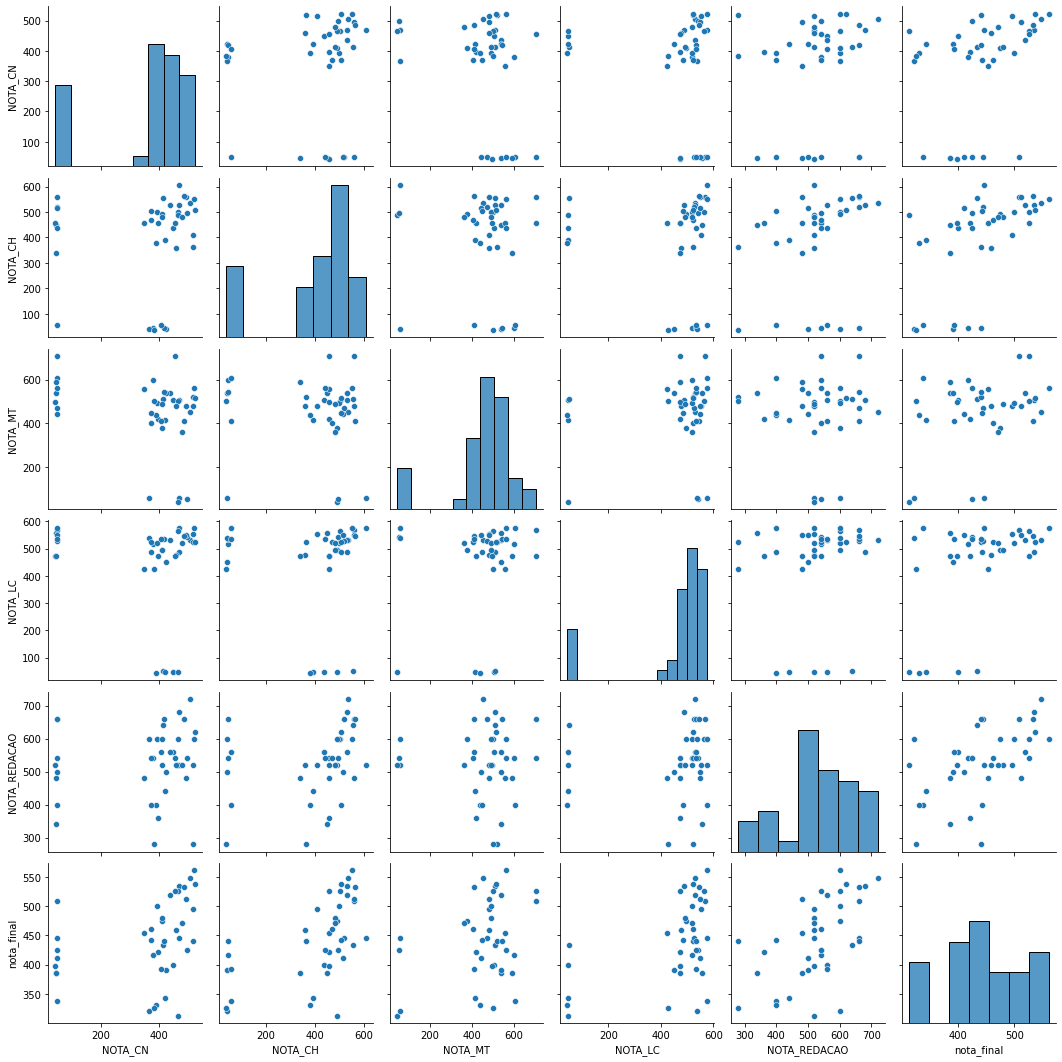

In [10]:
sns.pairplot(nota_colegiox);

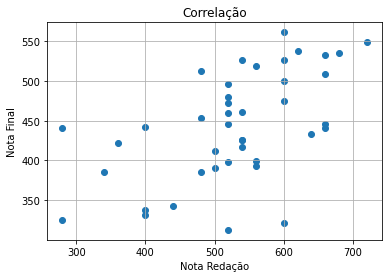

In [11]:
plt.scatter(nota_colegiox.NOTA_REDACAO, nota_colegiox.nota_final)
plt.title('Correlação')
plt.xlabel('Nota Redação')
plt.ylabel('Nota Final')
plt.grid(True)
plt.show()

In [12]:
correlacoes = nota_colegiox.corr(method='pearson')
correlacoes

,NOTA_CN,NOTA_CH,NOTA_MT,NOTA_LC,NOTA_REDACAO,nota_final
NOTA_CN,1.000000,0.083520,-0.299411,-0.158243,0.132366,0.352986
NOTA_CH,0.083520,1.000000,-0.078817,-0.040875,0.264781,0.579168
NOTA_MT,-0.299411,-0.078817,1.000000,0.137463,-0.024316,0.322042
NOTA_LC,-0.158243,-0.040875,0.137463,1.000000,0.125635,0.472561
NOTA_REDACAO,0.132366,0.264781,-0.024316,0.125635,1.000000,0.551220
nota_final,0.352986,0.579168,0.322042,0.472561,0.551220,1.000000


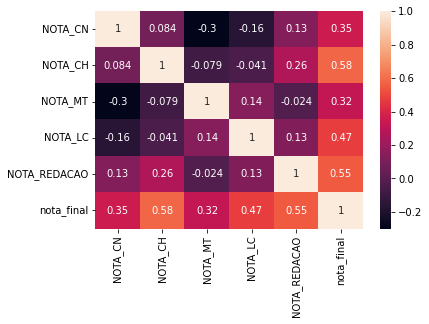

In [13]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## Análise da Normalidade

#### Teste Shapiro-Wilk
___
#### Ho = média é igual a de São Paulo: p > 0,05
#### Ha = média é diferente da de São Paulo: p <= 0,05

In [14]:
import scipy.stats as stats

In [15]:
# Nota de redação
stats.shapiro(nota_colegiox.NOTA_REDACAO)

ShapiroResult(statistic=0.952975869178772, pvalue=0.08905196189880371)

In [16]:
# Nota final
stats.shapiro(nota_colegiox.nota_final)

ShapiroResult(statistic=0.9638935923576355, pvalue=0.2148178666830063)

In [17]:
# Nota de matemática
stats.shapiro(nota_colegiox.NOTA_MT)

ShapiroResult(statistic=0.798567533493042, pvalue=5.104646334075369e-06)

In [18]:
# Nota de Ciências da Natureza
stats.shapiro(nota_colegiox.NOTA_CN)

ShapiroResult(statistic=0.7349029779434204, pvalue=2.995314787312964e-07)

In [19]:
# Nota de Linguagem e Códigos
stats.shapiro(nota_colegiox.NOTA_LC)

ShapiroResult(statistic=0.598617434501648, pvalue=2.23514540209635e-09)

In [20]:
# Nota de Ciências Humanas
stats.shapiro(nota_colegiox.NOTA_CH)

ShapiroResult(statistic=0.7509256601333618, pvalue=5.865637717761274e-07)

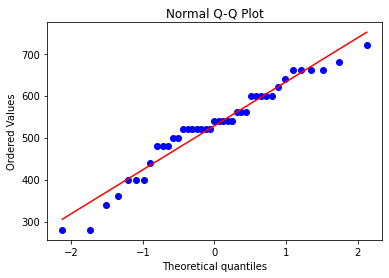

In [21]:
stats.probplot(nota_colegiox['NOTA_REDACAO'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

## Análise dos Outliers

In [22]:
grafico = px.box(nota_colegiox, y='NOTA_REDACAO')
grafico.show()

In [23]:
grafico = px.box(nota_colegiox, y='NOTA_MT')
grafico.show()

In [24]:
grafico = px.box(nota_colegiox, y='NOTA_CN')
grafico.show()

In [25]:
grafico = px.box(nota_colegiox, y='NOTA_LC')
grafico.show()

In [26]:
grafico = px.box(nota_colegiox, y='nota_final')
grafico.show()

## Regressão

##### Regressão Linear com Statsmodels

In [27]:
import statsmodels.formula.api as smf
import statsmodels.stats as sms

In [28]:
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data = nota_colegiox).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     17.02
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           0.000188
Time:                        20:20:59   Log-Likelihood:                -223.52
No. Observations:                  41   AIC:                             451.0
Df Residuals:                      39   BIC:                             454.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      251.6789     47.319      5.319   

In [29]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

              Coeficientes
Intercept       251.678855
NOTA_REDACAO      0.362749


### Equação:
Nota Final = 251.678855 +  0.362749*Nota Redação

In [30]:
nota_colegiox.head()

,NOTA_CN,NOTA_CH,NOTA_MT,NOTA_LC,NOTA_REDACAO,nota_final
37,46.3,447.2,537.1,557.3,340.0,385.58
44,505.9,534.5,451.9,529.8,720.0,548.42
52,449.4,436.4,506.4,45.8,560.0,399.60
65,468.6,606.1,59.5,576.6,520.0,446.16
79,414.3,553.7,510.6,49.5,640.0,433.62


In [31]:
regressao.predict()

array([375.01357169, 512.85825473, 454.81838819, 440.30842155,
       483.83832146, 382.268555  , 498.3482881 , 454.81838819,
       469.32835482, 440.30842155, 447.56340487, 433.05343823,
       491.09330478, 353.24862173, 440.30842155, 411.28848828,
       425.79845491, 440.30842155, 425.79845491, 447.56340487,
       491.09330478, 491.09330478, 447.56340487, 491.09330478,
       440.30842155, 469.32835482, 469.32835482, 396.77852164,
       447.56340487, 425.79845491, 396.77852164, 469.32835482,
       454.81838819, 433.05343823, 440.30842155, 353.24862173,
       469.32835482, 447.56340487, 440.30842155, 396.77852164,
       476.58333814])

In [32]:
residuos = regressao.resid
residuos

37         10.566428
44         35.561745
52        -55.218388
65          5.851578
79        -50.218321
84         39.811445
85         36.531712
91         63.921612
17070      57.251645
17072    -127.628422
17078     -22.083405
17110     -42.653438
108151     17.606695
108155     87.571378
108180     55.451578
138498    -68.448488
182510     86.501545
182519     18.771578
182528     27.621545
182546    -30.503405
182581    -45.833305
182613    -50.333305
182614     78.516595
182615     42.066695
182637    -42.508422
182683     31.031645
182697   -148.128355
230978    -59.558522
287389     13.896595
287716    -40.338455
347945    -65.858522
365950      5.551645
365951    -61.998388
365980    -21.493438
365984     39.151578
365986    -28.028622
378313     91.931645
445647    -22.163405
445741     31.491578
445790     45.381478
445809     60.956662
dtype: float64

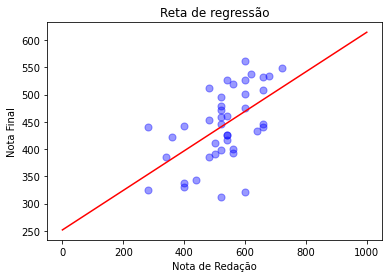

In [33]:
plt.scatter(y=nota_colegiox.nota_final,x=nota_colegiox.NOTA_REDACAO,color='blue',s=50,alpha=.4)
#X_plot = np.linspace(min(nota_colegiox.NOTA_REDACAO), max(nota_colegiox.NOTA_REDACAO), len(nota_colegiox.NOTA_REDACAO))
X_plot = np.linspace(0,1000)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.xlabel('Nota de Redação')
plt.ylabel('Nota Final')
plt.show()

## Teste de normalidade de resíduos

In [34]:
stats.shapiro(residuos)

ShapiroResult(statistic=0.9587119221687317, pvalue=0.1417592167854309)

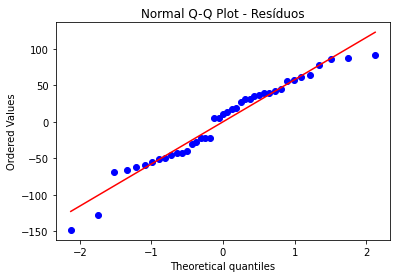

In [35]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal Q-Q Plot - Resíduos')
plt.show()

## Análise da Homocedasticidade dos resíduos

(resíduos com variação constante)

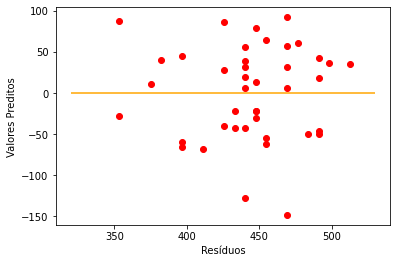

In [36]:
plt.scatter(y=residuos, x=regressao.predict(), color='red')
plt.hlines(y=0, xmin=320, xmax=530, color='orange')
plt.xlabel('Resíduos')
plt.ylabel('Valores Preditos')
plt.show()

## Regresão com Sklearn

In [37]:
x = nota_colegiox.iloc[:,4].values
y = nota_colegiox.iloc[:,5].values

In [38]:
correlacao2 = np.corrcoef(x, y)
correlacao2

array([[1.        , 0.55122032],
       [0.55122032, 1.        ]])

In [39]:
x = x.reshape(-1,1) # transformando em matriz

In [40]:
from sklearn.linear_model import LinearRegression
regressao2 = LinearRegression()
regressao2.fit(x,y)

LinearRegression()

In [42]:
regressao2.intercept_

251.6788552750226

In [43]:
regressao2.coef_

array([0.36274917])

In [44]:
# coeficiente de determinação
regressao2.score(x,y)

0.30384384379611706

In [45]:
previsoes = regressao2.predict(x)
previsoes

array([375.01357169, 512.85825473, 454.81838819, 440.30842155,
       483.83832146, 382.268555  , 498.3482881 , 454.81838819,
       469.32835482, 440.30842155, 447.56340487, 433.05343823,
       491.09330478, 353.24862173, 440.30842155, 411.28848828,
       425.79845491, 440.30842155, 425.79845491, 447.56340487,
       491.09330478, 491.09330478, 447.56340487, 491.09330478,
       440.30842155, 469.32835482, 469.32835482, 396.77852164,
       447.56340487, 425.79845491, 396.77852164, 469.32835482,
       454.81838819, 433.05343823, 440.30842155, 353.24862173,
       469.32835482, 447.56340487, 440.30842155, 396.77852164,
       476.58333814])

In [46]:
# previsão de uma nota que não está no array predict (x)
previsao = regressao2.predict([[330]])
previsao

array([371.38608003])